In [1]:
import pandas as pd
import numpy as np
import os
import datetime as dt
import calendar
from matplotlib import pyplot as plt
import scipy.stats as stats
import glob

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from mpl_toolkits.mplot3d import Axes3D  #3Dplot
import seaborn as sns
import japanize_matplotlib


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as ptick ##これが必要！

from sklearn.metrics import roc_auc_score

In [2]:
files = glob.glob('../../../卒論関連書類/データ/king_history/king_history1/*')
version = len(files)-1
df_king =pd.read_csv(f'../../../卒論関連書類/データ/king_history/king_history1/king{version}.csv',converters={'DateTime':pd.to_datetime})

df_king.columns

Index(['DateTime', 'intra_price(円/kWh)', 'spot_price(円/kWh)',
       'gap_price[intra-spot](円/kWh)', 'intra_volume（MWh/h）',
       'spot_volume(kWh)', '北電太陽光想定(kWh)', '北電風力想定(kWh)', '北電太陽光実績(kWh)',
       '北電風力実績(kWh)', '九電太陽光想定(kWh)', '九電太陽光実績(kWh)', '九電風力想定(kWh)',
       '九電風力実績(kWh)', '東電太陽光想定(kWh)', '東電太陽光実績(kWh)', '東電風力想定(kWh)',
       '東電風力実績(kWh)', '関電太陽光想定(kWh)', '関電太陽光実績(kWh)', '関電風力想定(kWh)',
       '関電風力実績(kWh)', '中国太陽光想定(kWh)', '中国風力想定(kWh)', '中国太陽光実績(kWh)',
       '中国風力実績(kWh)', '北海道予備率(%)', '東北予備率(%)', '東京予備率(%)', '中部予備率(%)',
       '北陸予備率(%)', '関西予備率(%)', '中国予備率(%)', '四国予備率(%)', '九州予備率(%)', '認可出力合計',
       '低下量合計', '停止・低下ユニット数合計', '北電太陽光error(実績-想定)(kWh)',
       '北電風力error(実績-想定)(kWh)', '九電太陽光error(実績-想定)(kWh)',
       '九電風力error(実績-想定)(kWh)', '東電太陽光error(実績-想定)(kWh)',
       '東電風力error(実績-想定)(kWh)', '関電太陽光error(実績-想定)(kWh)',
       '関電風力error(実績-想定)(kWh)', '中国太陽光error(実績-想定)(kWh)',
       '中国風力error(実績-想定)(kWh)', '絶対値北電太陽光error(実績-想定)(kWh)',
       '絶対値北電風力error(実績-想定)

In [3]:
def Get_values(target,start_point,end_point):
    cols = ['DateTime', 'gap_price[intra-spot](円/kWh)','低下量合計', '停止・低下ユニット数合計','intra_volume（MWh/h）','spot_volume(kWh)', '太陽光絶対値誤差合算(実績-想定)(kWh)',
       '風力絶対値誤差合算(実績-想定)(kWh)']

    df_select = df_king[cols]

    re_col = ['DateTime', '価格差 (時間前市場 - スポット市場) (Yen/kWh)','出力低下量合計 (kW)', '停止・低下ユニット数合計 (基)','時間前市場取引量 (kWh)','スポット市場取引量 (kWh)', '太陽光誤差(実績-想定)合算 (kWh)',
        '風力誤差(実績-想定)合算値 (kWh)'
        #    , 'エリア毎の広域予備率の平均値(%)'
        ]
    df_select.columns = re_col
    df_select.loc['時間前市場取引量 (kWh)'] =df_select['時間前市場取引量 (kWh)']*1000/2

    percent =50
    cols___=['DateTime', '価格差 (時間前市場 - スポット市場) (Yen/kWh)']+target
    df = df_select[cols___]
    df = df[(df['DateTime']>=start_point)&(df['DateTime']<=end_point)].dropna()


    df['judge'] =0

    df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'] =abs(df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'])
    judge_line = np.percentile(df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'],percent)
    

    df.loc[df['価格差 (時間前市場 - スポット市場) (Yen/kWh)']>judge_line,['judge']] =1
    df.drop(columns='価格差 (時間前市場 - スポット市場) (Yen/kWh)')
    # print(judge_line,np.median(df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'].values))# judgelineは中央値であることを確認した
    return(df)

def Get_values2022(target,start_point,end_point):
    cols = ['DateTime', 'gap_price[intra-spot](円/kWh)','低下量合計', '停止・低下ユニット数合計','intra_volume（MWh/h）','spot_volume(kWh)', '太陽光絶対値誤差合算(実績-想定)(kWh)',
       '風力絶対値誤差合算(実績-想定)(kWh)']

    df_select = df_king[cols].dropna()

    re_col = ['DateTime', '価格差 (時間前市場 - スポット市場) (Yen/kWh)','出力低下量合計 (kW)', '停止・低下ユニット数合計 (基)','時間前市場取引量 (kWh)','スポット市場取引量 (kWh)', '太陽光誤差(実績-想定)合算 (kWh)',
        '風力誤差(実績-想定)合算値 (kWh)'
        #    , 'エリア毎の広域予備率の平均値(%)'
        ]
    df_select.columns = re_col
    
    df_select.loc['時間前市場取引量 (kWh)'] =df_select['時間前市場取引量 (kWh)']*1000/2

    percent =50
    cols___=['DateTime', '価格差 (時間前市場 - スポット市場) (Yen/kWh)']+target
    df = df_select[cols___]
    df = df[(df['DateTime']>=start_point)&(df['DateTime']<=end_point)].dropna()


    df['judge'] =0

    df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'] =abs(df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'])
    judge_line = np.percentile(df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'],percent)
    

    df.loc[df['価格差 (時間前市場 - スポット市場) (Yen/kWh)']>judge_line,['judge']] =1
    df.drop(columns='価格差 (時間前市場 - スポット市場) (Yen/kWh)')
    # print(judge_line,np.median(df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'].values))# judgelineは中央値であることを確認した
    return(df)

def New_getNarashi(target,start_point,end_point):
    cols = ['DateTime', 'gap_price[intra-spot](円/kWh)','低下量合計', '停止・低下ユニット数合計','intra_volume（MWh/h）','spot_volume(kWh)', '太陽光誤差合算(実績-想定)(kWh)(ならし)',
       '風力誤差合算(実績-想定)(kWh)(ならし)']

    df_select = df_king[cols].dropna()

    re_col = ['DateTime', '価格差 (時間前市場 - スポット市場) (Yen/kWh)','出力低下量合計 (kW)', '停止・低下ユニット数合計 (基)','時間前市場取引量 (kWh)','スポット市場取引量 (kWh)', '太陽光誤差(実績-想定)合算 (kWh)',
        '風力誤差(実績-想定)合算値 (kWh)'
        #    , 'エリア毎の広域予備率の平均値(%)'
        ]
    df_select.columns = re_col
    
    df_select.loc['時間前市場取引量 (kWh)'] =df_select['時間前市場取引量 (kWh)']*1000/2

    percent =50
    cols___=['DateTime', '価格差 (時間前市場 - スポット市場) (Yen/kWh)']+target
    df = df_select[cols___]
    df = df[(df['DateTime']>=start_point)&(df['DateTime']<=end_point)].dropna()


    df['judge'] =0

    df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'] =abs(df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'])
    judge_line = np.percentile(df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'],percent)
    

    df.loc[df['価格差 (時間前市場 - スポット市場) (Yen/kWh)']>judge_line,['judge']] =1
    df.drop(columns='価格差 (時間前市場 - スポット市場) (Yen/kWh)')
    # print(judge_line,np.median(df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'].values))# judgelineは中央値であることを確認した
    return(df)


In [30]:
# df_test

In [31]:
# 結局やるのは20220101-20220930の、'停止・低下ユニット数合計 (基)','出力低下量合計 (kW)','スポット市場取引量 (kWh)','時間前市場取引量 (kWh)','太陽光誤差(実績-想定)合算 (kWh)',

year=2022
start_point = dt.datetime(year,1,1,0,0)
end_point = dt.datetime(year,12,31,23,30)
# target = ['出力低下量合計 (kW)','スポット市場取引量 (kWh)']
target = ['停止・低下ユニット数合計 (基)','出力低下量合計 (kW)','スポット市場取引量 (kWh)','時間前市場取引量 (kWh)','太陽光誤差(実績-想定)合算 (kWh)']
df_test =Get_values2022(target,start_point,end_point)

In [5]:
# 結局やるのは20220101-20220930の、'停止・低下ユニット数合計 (基)','出力低下量合計 (kW)','スポット市場取引量 (kWh)','時間前市場取引量 (kWh)','太陽光誤差(実績-想定)合算 (kWh)',

year=2022
start_point = dt.datetime(year,1,1,0,0)
end_point = dt.datetime(year,12,31,23,30)
# target = ['出力低下量合計 (kW)','スポット市場取引量 (kWh)']
target = [
    # '停止・低下ユニット数合計 (基)',
    '出力低下量合計 (kW)','スポット市場取引量 (kWh)','時間前市場取引量 (kWh)','太陽光誤差(実績-想定)合算 (kWh)']
df_test =Get_values2022(target,start_point,end_point)

# 正則化している
# 標準化もしてる
# df_Y=df_test['judge']
df_X = df_test[target]
# # 標準化
scaler = StandardScaler()
scaler.fit(np.array(df_X))
df_std = scaler.transform(np.array(df_X))
df_std = pd.DataFrame(df_std,columns=df_X.columns)

# 目的変数(Y)
# Y = np.array(df['gap_judge'])

# 説明変数(X)
# col_name = ['停止・低下ユニット数合計','spot_volume(kWh)']
X = np.array(df_std)
# X = np.array(df_X)
Y = np.array(df_test['judge'])
# データの分割(訓練データとテストデータ)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)




lr = LogisticRegression(penalty='l2',solver='liblinear',max_iter=1000,C=1) # ロジスティック回帰モデルのインスタンスを作成
lr.fit(X_train, Y_train) # ロジスティック回帰モデルの重みを学習

print("coefficient = ", lr.coef_)
print("intercept = ", lr.intercept_)


Y_pred = lr.predict(X_test)



print('confusion matrix = \n', confusion_matrix(y_true=Y_test, y_pred=Y_pred))
print('accuracy = ', accuracy_score(y_true=Y_test, y_pred=Y_pred))
print('precision = ', precision_score(y_true=Y_test, y_pred=Y_pred))
print('recall = ', recall_score(y_true=Y_test, y_pred=Y_pred))
print('f1 score = ', f1_score(y_true=Y_test, y_pred=Y_pred))
print('')
Y_score = lr.predict_proba(X_test)[:, 1] # 検証データがクラス1に属する確率

print('auc = ', roc_auc_score(y_true=Y_test, y_score=Y_score))

coefficient =  [[-0.07590951  0.26946172  0.29298524  0.26001025]]
intercept =  [0.00791982]
confusion matrix = 
 [[1218  745]
 [ 823 1146]]
accuracy =  0.6012207527975585
precision =  0.6060285563194078
recall =  0.5820213306246825
f1 score =  0.5937823834196891

auc =  0.6566371214341913


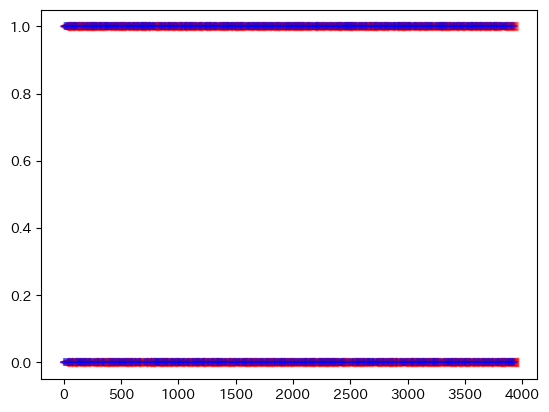

In [97]:
plt.scatter(list(range(len(Y_test))),Y_test,alpha=0.1,color='r',marker='<')
plt.scatter(list(range(len(Y_test))),Y_pred,alpha=0.1,color='b',marker='+')

In [49]:
# 少なくしてみたらどうなるか

year=2022
start_point = dt.datetime(year,1,1,0,0)
end_point = dt.datetime(year,12,31,23,30)
# target = ['出力低下量合計 (kW)','スポット市場取引量 (kWh)']
target = ['出力低下量合計 (kW)','スポット市場取引量 (kWh)','太陽光誤差(実績-想定)合算 (kWh)'
# ,'風力誤差(実績-想定)合算値 (kWh)'
]
df_test =Get_values2022(target,start_point,end_point)

# 正則化している
# 標準化もしてる
# df_Y=df_test['judge']
df_X = df_test[target]
# # 標準化
# scaler = StandardScaler()
# scaler.fit(np.array(df_X))
# df_std = scaler.transform(np.array(df_X))
# df_std = pd.DataFrame(df_std,columns=df_X.columns)

# 目的変数(Y)
# Y = np.array(df['gap_judge'])

# 説明変数(X)
# col_name = ['停止・低下ユニット数合計','spot_volume(kWh)']
# X = np.array(df_std)
X = np.array(df_X)
Y = np.array(df_test['judge'])
# データの分割(訓練データとテストデータ)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)




lr = LogisticRegression(penalty='l2',solver='liblinear',max_iter=1000,C=100) # ロジスティック回帰モデルのインスタンスを作成
lr.fit(X_train, Y_train) # ロジスティック回帰モデルの重みを学習

print("coefficient = ", lr.coef_)
print("intercept = ", lr.intercept_)


Y_pred = lr.predict(X_test)



print('confusion matrix = \n', confusion_matrix(y_true=Y_test, y_pred=Y_pred))
print('accuracy = ', accuracy_score(y_true=Y_test, y_pred=Y_pred))
print('precision = ', precision_score(y_true=Y_test, y_pred=Y_pred))
print('recall = ', recall_score(y_true=Y_test, y_pred=Y_pred))
print('f1 score = ', f1_score(y_true=Y_test, y_pred=Y_pred))
print('')
Y_score = lr.predict_proba(X_test)[:, 1] # 検証データがクラス1に属する確率

print('auc = ', roc_auc_score(y_true=Y_test, y_score=Y_score))

coefficient =  [[-1.98861605e-08  3.78942685e-08  5.74078630e-07]]
intercept =  [-2.3178682e-13]
confusion matrix = 
 [[1086  877]
 [ 778 1191]]
accuracy =  0.5790946083418108
precision =  0.5759187620889749
recall =  0.6048755713560183
f1 score =  0.5900421104780779

auc =  0.6216700166901803


In [73]:
# 結局やるのは20220101-20220930の、'停止・低下ユニット数合計 (基)','出力低下量合計 (kW)','スポット市場取引量 (kWh)','時間前市場取引量 (kWh)','太陽光誤差(実績-想定)合算 (kWh)',

# 絶対値の合算じゃないと効果はなかった
year=2022
start_point = dt.datetime(year,1,1,0,0)
end_point = dt.datetime(year,12,31,23,30)
# target = ['出力低下量合計 (kW)','スポット市場取引量 (kWh)']
target = ['停止・低下ユニット数合計 (基)','出力低下量合計 (kW)','スポット市場取引量 (kWh)','時間前市場取引量 (kWh)','太陽光誤差(実績-想定)合算 (kWh)']
df_test =New_getNarashi(target,start_point,end_point)

# 正則化している
# 標準化もしてる
# df_Y=df_test['judge']
df_X = df_test[target]
# # 標準化
# scaler = StandardScaler()
# scaler.fit(np.array(df_X))
# df_std = scaler.transform(np.array(df_X))
# df_std = pd.DataFrame(df_std,columns=df_X.columns)

# 目的変数(Y)
# Y = np.array(df['gap_judge'])

# 説明変数(X)
# col_name = ['停止・低下ユニット数合計','spot_volume(kWh)']
# X = np.array(df_std)
X = np.array(df_X)
Y = np.array(df_test['judge'])
# データの分割(訓練データとテストデータ)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)




lr = LogisticRegression(penalty='l2',solver='liblinear',max_iter=1000,C=100) # ロジスティック回帰モデルのインスタンスを作成
lr.fit(X_train, Y_train) # ロジスティック回帰モデルの重みを学習

print("coefficient = ", lr.coef_)
print("intercept = ", lr.intercept_)


Y_pred = lr.predict(X_test)



print('confusion matrix = \n', confusion_matrix(y_true=Y_test, y_pred=Y_pred))
print('accuracy = ', accuracy_score(y_true=Y_test, y_pred=Y_pred))
print('precision = ', precision_score(y_true=Y_test, y_pred=Y_pred))
print('recall = ', recall_score(y_true=Y_test, y_pred=Y_pred))
print('f1 score = ', f1_score(y_true=Y_test, y_pred=Y_pred))
print('')
Y_score = lr.predict_proba(X_test)[:, 1] # 検証データがクラス1に属する確率

print('auc = ', roc_auc_score(y_true=Y_test, y_score=Y_score))

coefficient =  [[ 4.00824122e-10 -1.94527224e-08  4.92031598e-08  2.62891383e-07
   3.64786334e-08]]
intercept =  [-7.64465561e-11]
confusion matrix = 
 [[ 861 1102]
 [ 657 1312]]
accuracy =  0.5526449643947101
precision =  0.5434962717481359
recall =  0.6663280853224988
f1 score =  0.5986767054528862

auc =  0.5814438622903605


In [ ]:
, '太陽光誤差合算(実績-想定)(kWh)(ならし)',
       '風力誤差合算(実績-想定)(kWh)(ならし)'

In [76]:
df_king[['太陽光誤差合算(実績-想定)(kWh)(ならし)',
       '風力誤差合算(実績-想定)(kWh)(ならし)']].dropna().min()

太陽光誤差合算(実績-想定)(kWh)(ならし)   -4.572063e+06
風力誤差合算(実績-想定)(kWh)(ならし)    -2.241268e+05
dtype: float64

In [67]:
# グラフは４次元だから書けない

# plt.scatter(X_test[:,0],Y_score)

In [64]:
X_test[:,0]

array([30193800., 56907300., 31953400., ..., 44154390., 41755600.,
       36414400.])

In [65]:
X_test

array([[30193800.        , 19984900.        ,   132625.10176537],
       [56907300.        , 16635450.        ,   164399.12736033],
       [31953400.        , 24339150.        ,   925307.09052781],
       ...,
       [44154390.        , 18055450.        ,   127528.24895785],
       [41755600.        , 19415900.        ,        0.        ],
       [36414400.        , 14827500.        ,        0.        ]])

In [ ]:
from sklearn.metrics import roc_auc_score
Y_score = lr.predict_proba(X_test)[:, 1] # 検証データがクラス1に属する確率

print('auc = ', roc_auc_score(y_true=Y_test, y_score=Y_score))


In [20]:
from sklearn.metrics import roc_auc_score
Y_score = lr.predict_proba(X_test)[:, 1] # 検証データがクラス1に属する確率

print('auc = ', roc_auc_score(y_true=Y_test, y_score=Y_score))


auc =  0.6217059790998893


In [5]:
# 正則化している
# 標準化もしてる
# df_Y=df_test['judge']
df_X = df_test[target]
# 標準化
scaler = StandardScaler()
scaler.fit(np.array(df_X))
df_std = scaler.transform(np.array(df_X))
df_std = pd.DataFrame(df_std,columns=df_X.columns)

# 目的変数(Y)
# Y = np.array(df['gap_judge'])

# 説明変数(X)
# col_name = ['停止・低下ユニット数合計','spot_volume(kWh)']
X = np.array(df_std)
Y = np.array(df_test['judge'])
# データの分割(訓練データとテストデータ)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)




lr = LogisticRegression(penalty='l1',solver='liblinear') # ロジスティック回帰モデルのインスタンスを作成
lr.fit(X_train, Y_train) # ロジスティック回帰モデルの重みを学習

print("coefficient = ", lr.coef_)
print("intercept = ", lr.intercept_)


Y_pred = lr.predict(X_test)



print('confusion matrix = \n', confusion_matrix(y_true=Y_test, y_pred=Y_pred))
print('accuracy = ', accuracy_score(y_true=Y_test, y_pred=Y_pred))
print('precision = ', precision_score(y_true=Y_test, y_pred=Y_pred))
print('recall = ', recall_score(y_true=Y_test, y_pred=Y_pred))
print('f1 score = ', f1_score(y_true=Y_test, y_pred=Y_pred))



coefficient =  [[-0.1081072  0.2834366]]
intercept =  [0.01258483]
confusion matrix = 
 [[1445 1241]
 [1079 1491]]
accuracy =  0.558599695585997
precision =  0.5457540263543191
recall =  0.5801556420233464
f1 score =  0.5624292719728404


In [7]:
year=2022
start_point = dt.datetime(year,1,1,0,0)
end_point = dt.datetime(year,12,31,23,30)
target = ['出力低下量合計 (kW)','スポット市場取引量 (kWh)']
df_test =Get_values(target,start_point,end_point)

# 正則化している
# df_Y=df_test['judge']
df_X = df_test[target]
# 標準化
# scaler = StandardScaler()
# scaler.fit(np.array(df_X))
# df_std = scaler.transform(np.array(df_X))
# df_std = pd.DataFrame(df_std,columns=df_X.columns)

# 目的変数(Y)
# Y = np.array(df['gap_judge'])

# 説明変数(X)
# col_name = ['停止・低下ユニット数合計','spot_volume(kWh)']
X = np.array(df_X)
Y = np.array(df_test['judge'])
# データの分割(訓練データとテストデータ)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)




lr = LogisticRegression(penalty='l1',solver='liblinear',max_iter=1000) # ロジスティック回帰モデルのインスタンスを作成
lr.fit(X_train, Y_train) # ロジスティック回帰モデルの重みを学習

print("coefficient = ", lr.coef_)
print("intercept = ", lr.intercept_)


Y_pred = lr.predict(X_test)



print('confusion matrix = \n', confusion_matrix(y_true=Y_test, y_pred=Y_pred))
print('accuracy = ', accuracy_score(y_true=Y_test, y_pred=Y_pred))
print('precision = ', precision_score(y_true=Y_test, y_pred=Y_pred))
print('recall = ', recall_score(y_true=Y_test, y_pred=Y_pred))
print('f1 score = ', f1_score(y_true=Y_test, y_pred=Y_pred))

C:\Users\Annex Rakyu\AppData\Local\Temp\ipykernel_25576\2737269267.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['時間前市場取引量 (kWh)'] =df_select['時間前市場取引量 (kWh)']*1000/2


coefficient =  [[-9.40008910e-09  1.07687976e-07]]
intercept =  [-1.50352343]
confusion matrix = 
 [[1443 1243]
 [1075 1495]]
accuracy =  0.5589802130898022
precision =  0.5460189919649379
recall =  0.5817120622568094
f1 score =  0.5633006782215524


c:\Users\Annex Rakyu\.conda\envs\DS385\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [29]:
df

,DateTime,価格差 (時間前市場 - スポット市場) (Yen/kWh),風力誤差(実績-想定)合算値 (kWh),judge
66655,2022-01-01 00:00:00,5.11,24983.843486,1
66656,2022-01-01 00:30:00,5.93,27201.553453,1
66657,2022-01-01 01:00:00,5.71,30913.700497,1
66658,2022-01-01 01:30:00,3.27,27555.744709,1
66659,2022-01-01 02:00:00,3.54,24570.421317,1
...,...,...,...,...
79754,2022-09-30 21:30:00,1.92,42780.147236,0
79755,2022-09-30 22:00:00,0.13,36939.208319,0
79756,2022-09-30 22:30:00,0.57,42335.191793,0
79757,2022-09-30 23:00:00,0.29,38608.958776,0


In [10]:
year=2022
start_point = dt.datetime(year,1,1,0,0)
end_point = dt.datetime(year,12,31,23,30)
target = ['出力低下量合計 (kW)', '停止・低下ユニット数合計 (基)','時間前市場取引量 (kWh)','スポット市場取引量 (kWh)', '太陽光誤差(実績-想定)合算 (kWh)',
        '風力誤差(実績-想定)合算値 (kWh)']
df_test =Get_values(target,start_point,end_point)

# 正則化している
# df_Y=df_test['judge']
df_X = df_test[target]
# 標準化
# scaler = StandardScaler()
# scaler.fit(np.array(df_X))
# df_std = scaler.transform(np.array(df_X))
# df_std = pd.DataFrame(df_std,columns=df_X.columns)

# 目的変数(Y)
# Y = np.array(df['gap_judge'])

# 説明変数(X)
# col_name = ['停止・低下ユニット数合計','spot_volume(kWh)']
X = np.array(df_X)
Y = np.array(df_test['judge'])
# データの分割(訓練データとテストデータ)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)




lr = LogisticRegression(penalty='l1',solver='liblinear',max_iter=1000) # ロジスティック回帰モデルのインスタンスを作成
lr.fit(X_train, Y_train) # ロジスティック回帰モデルの重みを学習

print("coefficient = ", lr.coef_)
print("intercept = ", lr.intercept_)


Y_pred = lr.predict(X_test)



print('confusion matrix = \n', confusion_matrix(y_true=Y_test, y_pred=Y_pred))
print('accuracy = ', accuracy_score(y_true=Y_test, y_pred=Y_pred))
print('precision = ', precision_score(y_true=Y_test, y_pred=Y_pred))
print('recall = ', recall_score(y_true=Y_test, y_pred=Y_pred))
print('f1 score = ', f1_score(y_true=Y_test, y_pred=Y_pred))

C:\Users\Annex Rakyu\AppData\Local\Temp\ipykernel_25576\2737269267.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['時間前市場取引量 (kWh)'] =df_select['時間前市場取引量 (kWh)']*1000/2


coefficient =  [[ 1.02272403e-09 -2.78671738e-03  1.57328247e-06  1.00543478e-07
   4.90525217e-07 -5.57715000e-07]]
intercept =  [-2.14190954]
confusion matrix = 
 [[1215  748]
 [ 812 1157]]
accuracy =  0.6032553407934893
precision =  0.6073490813648293
recall =  0.5876079228034535
f1 score =  0.5973154362416107


c:\Users\Annex Rakyu\.conda\envs\DS385\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [23]:
# df_Y=df_test['judge']
df_X = df_test[target]
# 標準化
scaler = StandardScaler()
scaler.fit(np.array(df_X))
df_std = scaler.transform(np.array(df_X))
df_std = pd.DataFrame(df_std,columns=df_X.columns)

# 目的変数(Y)
# Y = np.array(df['gap_judge'])

# 説明変数(X)
# col_name = ['停止・低下ユニット数合計','spot_volume(kWh)']
X = np.array(df_std)
Y = np.array(df_test['judge'])
# データの分割(訓練データとテストデータ)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)




lr = LogisticRegression(penalty='l1', solver='liblinear') # ロジスティック回帰モデルのインスタンスを作成
lr.fit(X_train, Y_train) # ロジスティック回帰モデルの重みを学習

print("coefficient = ", lr.coef_)
print("intercept = ", lr.intercept_)


Y_pred = lr.predict(X_test)



print('confusion matrix = \n', confusion_matrix(y_true=Y_test, y_pred=Y_pred))
print('accuracy = ', accuracy_score(y_true=Y_test, y_pred=Y_pred))
print('precision = ', precision_score(y_true=Y_test, y_pred=Y_pred))
print('recall = ', recall_score(y_true=Y_test, y_pred=Y_pred))
print('f1 score = ', f1_score(y_true=Y_test, y_pred=Y_pred))

coefficient =  [[-0.10811531  0.28343473]]
intercept =  [0.01258498]
confusion matrix = 
 [[1445 1241]
 [1079 1491]]
accuracy =  0.558599695585997
precision =  0.5457540263543191
recall =  0.5801556420233464
f1 score =  0.5624292719728404


In [24]:
df_X

,出力低下量合計 (kW),スポット市場取引量 (kWh)
66655,29902740.0,16671250
66656,27860240.0,17250450
66657,27860240.0,17568350
66658,27860240.0,17867750
66659,27860240.0,17997900
...,...,...
84170,49386670.0,19267150
84171,50888670.0,19020650
84172,50888670.0,18906400
84173,50888670.0,18719700


In [4]:

cols = ['DateTime', 'gap_price[intra-spot](円/kWh)','低下量合計', '停止・低下ユニット数合計','intra_volume（MWh/h）','spot_volume(kWh)', '太陽光絶対値誤差合算(実績-想定)(kWh)',
       '風力絶対値誤差合算(実績-想定)(kWh)']

df_select = df_king[cols]

re_col = ['DateTime', '価格差 (時間前市場 - スポット市場) (Yen/kWh)','出力低下量合計 (kW)', '停止・低下ユニット数合計 (基)','時間前市場取引量 (kWh)','スポット市場取引量 (kWh)', '太陽光誤差(実績-想定)合算 (kWh)',
       '風力誤差(実績-想定)合算値 (kWh)'
    #    , 'エリア毎の広域予備率の平均値(%)'
       ]
df_select.columns = re_col
df_select['時間前市場取引量 (kWh)'] =df_select['時間前市場取引量 (kWh)']*1000/2

percent =50
# これは各年

# for year in range(2018,2023):

# for year in range(2018,2023):
year=2022
start_point = dt.datetime(year,1,1,0,0)
end_point = dt.datetime(year,12,31,23,30)

# まず、データがある分すべての相関をとる。
target =re_col[2:]
for name in target:
    df = df_select[['DateTime', '価格差 (時間前市場 - スポット市場) (Yen/kWh)',name]]
    df = df[(df['DateTime']>=start_point)&(df['DateTime']<=end_point)].dropna()


    df['judge'] =0

    df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'] =abs(df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'])
    judge_line = np.percentile(df['価格差 (時間前市場 - スポット市場) (Yen/kWh)'],percent)

    df.loc[df['価格差 (時間前市場 - スポット市場) (Yen/kWh)']>judge_line,['judge']] =1

    value0 = df[df['judge']==0][name].values
    value1 = df[df['judge']==1][name].values
    times =df['DateTime'].dt.date.values



C:\Users\Annex Rakyu\AppData\Local\Temp\ipykernel_17056\2069483604.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['時間前市場取引量 (kWh)'] =df_select['時間前市場取引量 (kWh)']*1000/2
